# NBA Salary Predictor
### By Adrian Rabadam and Michael Finch

In [11]:
from IPython.display import Image, display

## Introduction

In looking for a fun dataset to focus this project on, Michael and I quickly realized we had a shared interest in the NBA and player statistics. Specifically, we also shared the belief that too many players in the NBA were being overpaid. Upon finding two solid datasets filled with player stats throughout history and player salaries over the years, we decided to make a classifier which predicted the range of a player's career average salary given a set of stats. To do this, we constructed four classifiers: k-Nearest Neighbors, Naive Bayes, a Decision Tree, and a Random Forest of Decision Trees. After running performance evaluations on these classifiers, the normal decision tree proved to be the most effective at predicting our classifier label. This ended up being the classifier we deployed through a Heroku app.


## Data Analysis

Aside from some standard, categorical player information, such as birthplace, draft team, and height, most of the attributes in this dataset are continuous. Standard attributes included a player's career points per game, assists per game, and rebounds per game. However, more advanced categorical stats included a player's PER (player efficiency rating), win shares, and true shooting percentage. The other dataset used contained only player career salaries, organized by a player's year in the nba. This dataset was converted to a categorical attribute and acted as our classifier label after inner joining it with the larger nba player dataset. Both datasets can be found at the source below.

## NBA datasets source: https://data.world/datadavis/nba-salaries/

After joining these two datasets, a total of 856 players were left in our final dataset (cut down from 4686 in the original dataset). Cleaning took into account the career games played, with players who played less than 164 games (2 full seasons) not making the cut. Furthermore, players drafted before 2000 were also not included, which notably ruled out a large amount of landmark players. The reason for this was to help the salary adjustment for inflation, as well as the natural change that has occurred in the past two decades concerning salary amount and the sort of value placed on players. Cleaning also involved removing any instances missing attribute values.

### Dataset statistics
* Number of instances before cleaning: 4686
* Number of instances after cleaning: 856
* Smallest average salary: $70,000.00 
* Largest average salary: $15,466,761.00
* Discretized Range for Salaries (Millions of US Dollars):
1. < 1.61
2. 1.61 - 3.15
3. 3.15 - 4.69
4. 4.69 - 6.22
5. 6.23 - 7.77
6. 7.77 - 9.31
7. 9.31 - 10.85
8. 10.85 - 12.39
9. 12.38 - 13.93
10. 13.93 <




# Visualizations

## Distribution of classifications: 

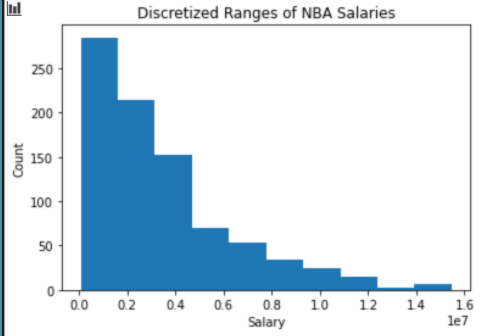

In [12]:
display(Image(filename="images/ranges.png"))

## Correlation Scatter Plots

### Career Points per Game vs. Salary

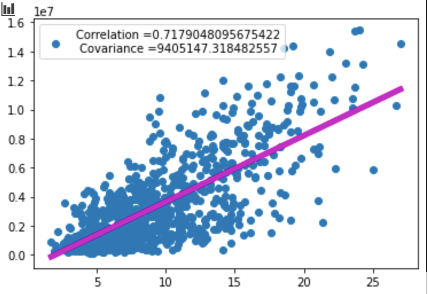

In [14]:
display(Image(filename="images/pts.png"))

### Player Efficiency Rating vs. Salary

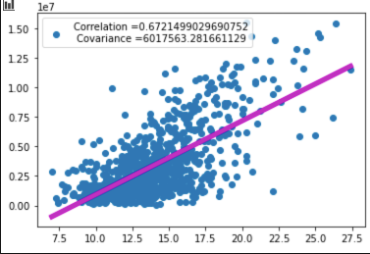

In [15]:
display(Image(filename="images/per.png"))

### Draft Year vs. Salary

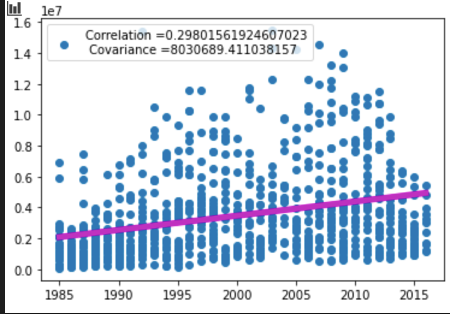

In [16]:
display(Image(filename="images/draft_year.png"))

### Career Games vs. Salary

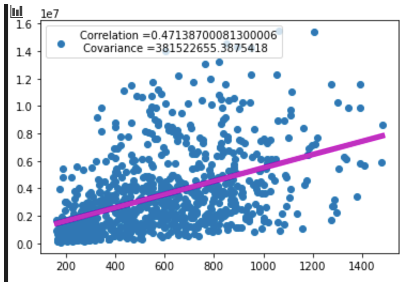

In [17]:
display(Image(filename="images/games.png"))

### Career Effective Field Goal % vs. Salary

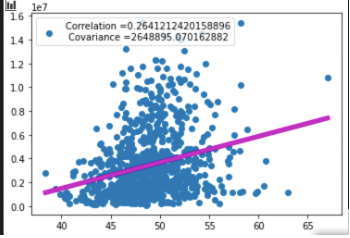

In [18]:
display(Image(filename="images/efg.png"))

### Career Effective Field Goal % vs. Salary

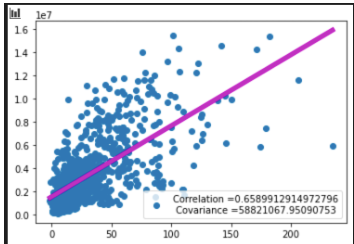

In [19]:
display(Image(filename="images/ws.png"))

## Classification Results

In performing the classification procedure for each of our four classifiers, a similar method was applied to each. An X set was created by pulling the attributes of focus from the instances in the dataset, those being PER, win shares, and games played. A corresponding y_set was also created for the salary category ranks. For k-Nearest Neighbors, Naive Bayes, and the Decision Tree, a stratified 10 k-fold cross validation was performed to create a training set and test set. After fitting the training set on these three classifiers, prediction sets were made using the created X_test. These values were then compared to the actual, instance classifier labels in order to compute accuracies for each classifier. These accuracy values can be seen below:

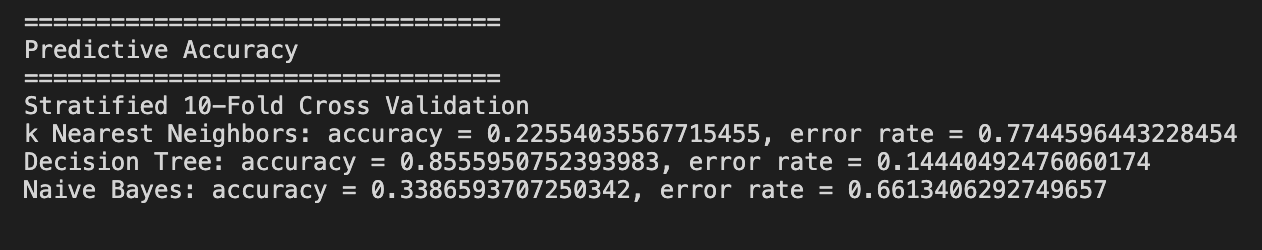

In [21]:
display(Image(filename="images/dkn_accuracy.png"))

For the random forest classifier, a different, but similarly focused approach was taken. In fitting the X_set to the classifier, the data was split into a test set and a remainder set. The test set was stratified in order to help reflect the actual distribution in the dataset, just as was done with the previous three classifier. The remainder set was then used for training and validation for each decision tree. To create these sets, bagging was performed to randomly create a validation set (with replacement) with the rest of the remainder set making up a training set. Performance evaluation was then done on each of the N trees using the unique validation and training sets to compute accuracy values. The M most accurate trees were then stored in the classifier and are used to predict the salary labels from the passed in test sets. The classifier's performance as a whole was then measured by running its created test through it, posting an accuracy seen below:

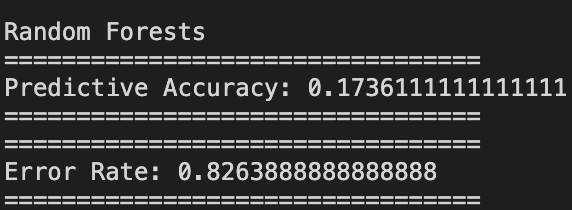

In [22]:
display(Image(filename="images/rf_accuracy.png"))


Through this evaluation, the decision tree proved to be the most accurate and was used for deployment. The link for the Heroku app is provided below:

### NBA Salary Predictor Heroku App: https://nba-salary-app-adrian-michael.herokuapp.com/


## Conclusion 


From the very beginning of finding the NBA players dataset, it was clear that we had a wide range of options when it came to making predictions. Pairing it with the salary dataset seemed like a good way to make the dataset applicable to an important aspect of sports organizations today. Given the comprehensiveness of the dataset, it was immediately difficult to decide how to cut it down, both in feature selection and data cleaning, which would be integral to our classification label since it is very dependent on the time period. However, once this dataset was cut down and approriate features were made, it was simple to design the classification process, especially with our past experience with these specific classifiers. The random forest classifier was certainly new, but it still dealt with practices and tools we were already familiar with (i.e. stratification, decision trees, testing/training), so it was important for us to keep that in mind when approaching that classifier specifically. Despite this, it was clear that the decision tree perormed the best with the attributes we selected, and deciding that this was the model to deploy was easy given the accuracies we compared. To improve its performance in the future, more work could be done to cut down the players dataset, given just how skewed it was to the lower end of salary ranges. Furthermore, we could consider more weight on the more modern instances of players and statistics due to its reflection on the current salary market of the NBA and the nature of the classifier for prediction.

### To see more of our thought and coding process and how we obtained the results we did, please consult the other notebooks in this directory. 